# Chapter 3 - IMDB Movie Reviews Binary Classification with Embedding RNNs

In [27]:
import random
import numpy as np
from keras import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.preprocessing.sequence import pad_sequences

## Load Dataset

In [26]:
(x_train, train_labels), (x_test, test_labels) = imdb.load_data(num_words = 10000)

maxlen = 20
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

## Decode Reviews to English

In [28]:
def decode_to_english(sequence):

  word_index = imdb.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])
  
  return decoded_review

index = random.randint(0, len(train_data))
sequence = train_data[index]
decoded_sequence = decode_to_english(sequence = sequence)

print(f'Sequence: {sequence}\nDecoded Sequence: {decoded_sequence}')

Sequence: [ 500    9    4 1766 2074  651   12   16   99   76 5100   23    4  226
   13   40    4  500    6  176]
Decoded Sequence: game is the russian boat level it was too much pressure on the whole i like the game a lot


## Build the Model

In [29]:
def build_model(dim):
  model = Sequential()

  # Add layers
  model.add(Embedding(input_dim = 10000, output_dim = 8, input_length = maxlen))
  model.add(Flatten())
  model.add(Dense(units = 1, activation = 'sigmoid'))

  # Compile model
  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [30]:
def train_model(model, x_train, y_train, epochs, batch_size, validation_split):
  history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split, verbose = 2)
  return history

## Graph Training Process

In [31]:
def plot(ax, history, metric):
  ax.set_title(f'{metric} per Epoch')
  ax.plot(history.history[metric], label = metric)
  ax.plot(history.history['val_' + metric], 'ro', label = f'Validation {metric}')
  ax.legend()  

## Evaluating the Model

In [32]:
def evaluate_model(model, x_test, y_test):
  results = model.evaluate(x_test, y_test, verbose = 0)
  return results

## Making Predictions

In [33]:
def predict(model, sequence):
  return model.predict(sequence)

## Wrap Up

In [34]:
# Convert labels to numpy array
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Epoch 1/10
469/469 - 2s - loss: 0.6798 - accuracy: 0.6012 - val_loss: 0.6467 - val_accuracy: 0.6913
Epoch 2/10
469/469 - 1s - loss: 0.5772 - accuracy: 0.7434 - val_loss: 0.5480 - val_accuracy: 0.7257
Epoch 3/10
469/469 - 1s - loss: 0.4849 - accuracy: 0.7796 - val_loss: 0.5090 - val_accuracy: 0.7438
Epoch 4/10
469/469 - 1s - loss: 0.4359 - accuracy: 0.8025 - val_loss: 0.4960 - val_accuracy: 0.7494
Epoch 5/10
469/469 - 1s - loss: 0.4036 - accuracy: 0.8209 - val_loss: 0.4927 - val_accuracy: 0.7563
Epoch 6/10
469/469 - 1s - loss: 0.3779 - accuracy: 0.8322 - val_loss: 0.4946 - val_accuracy: 0.7575
Epoch 7/10
469/469 - 1s - loss: 0.3550 - accuracy: 0.8464 - val_loss: 0.4993 - val_accuracy: 0.7565
Epoch 8/10
469/469 - 1s - loss: 0.3345 - accuracy: 0.8583 - val_loss: 0.5053 - val_accuracy: 0.7547
Epoch 9/10
469/469 - 1s - loss: 0.3148 - accuracy: 0.8687 - val_loss: 0.5135 - val_accuracy: 0.7527
Epoch 10/10
469/469 - 1s - loss: 0.2959 - accuracy: 0.8779 - val_loss: 0.5214 - val_accuracy: 0.7540

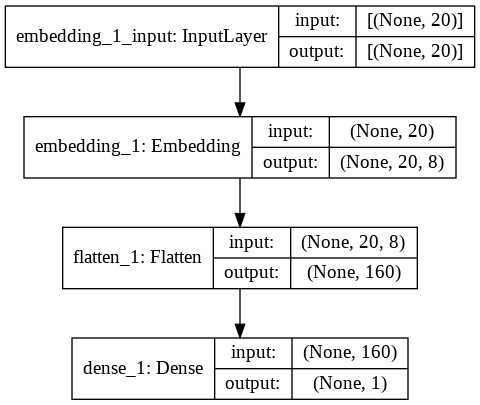

In [39]:
# Build and train the model
model = build_model(dim = x_train.shape[1])

history = train_model(
    model = model,
    x_train = x_train, 
    y_train = y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.4
)

model.summary()
plot_model(model, show_shapes = True)  

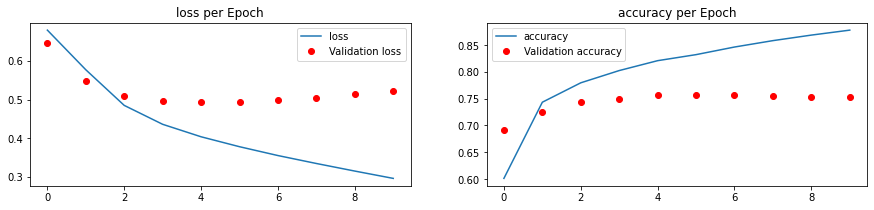

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15, 3))

# Graph training process
plot(ax[0], history, 'loss')
plot(ax[1], history, 'accuracy')
plt.show()

In [41]:
# Evaluate the model
loss, acc = evaluate_model(model, x_test, y_test)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(acc * 100, 2)}%')

Loss: 0.51, Accuracy: 75.88%


In [42]:
# Prediction
pred = predict(model, x_test[:1])[0, 0]

text = decode_to_english(test_data[0])
print('Text:', ' '.join(text.replace('?', '').split()))

if round(pred) == 1:
  print(f'POSITIVE ({round(pred * 100, 2)}%)')
else:
  print(f'NEGATIVE ({round((1 - pred) * 100, 2)}%)')

Text: wasn't going to work out and his performance was quite so all you madison fans give this a miss
NEGATIVE (72.7%)
